## Importing Necessary Libraries

In [267]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [144]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [145]:
bike_df.shape

(730, 16)

In [146]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [147]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Missing Value Check

In [148]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [149]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Drop columns

#### Dropping instant, dteday, casual, registered columns because they are not significant to the target variable "cnt"

In [150]:
bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [151]:
bike_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


## Exploratory Data Analysis

#### Mapping categorical data to its actual values

In [152]:
bike_df['season'] = bike_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['mnth'] = bike_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_df['yr'] = bike_df['yr'].replace({0:'2018', 1:'2019'})
bike_df['weekday'] = bike_df['weekday'].replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
bike_df['weathersit'] = bike_df['weathersit'].replace({1:'clear', 2:'mist', 3:'snow', 4:'rain'})

In [153]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [154]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Univariate Analysis:

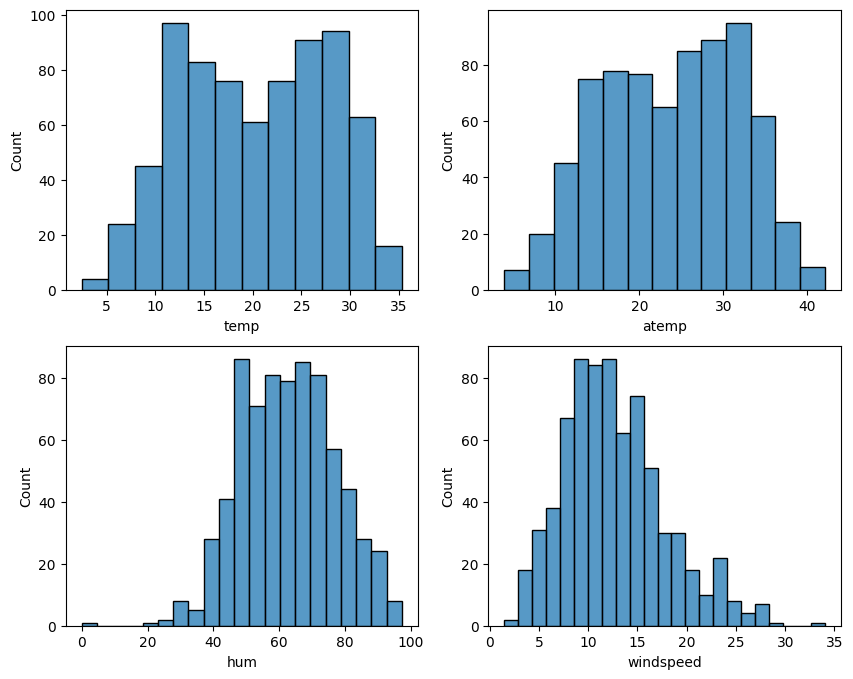

In [155]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data=bike_df, x='temp')
plt.subplot(2,2,2)
sns.histplot(data=bike_df, x='atemp')
plt.subplot(2,2,3)
sns.histplot(data=bike_df, x='hum')
plt.subplot(2,2,4)
sns.histplot(data=bike_df, x='windspeed')
plt.show()

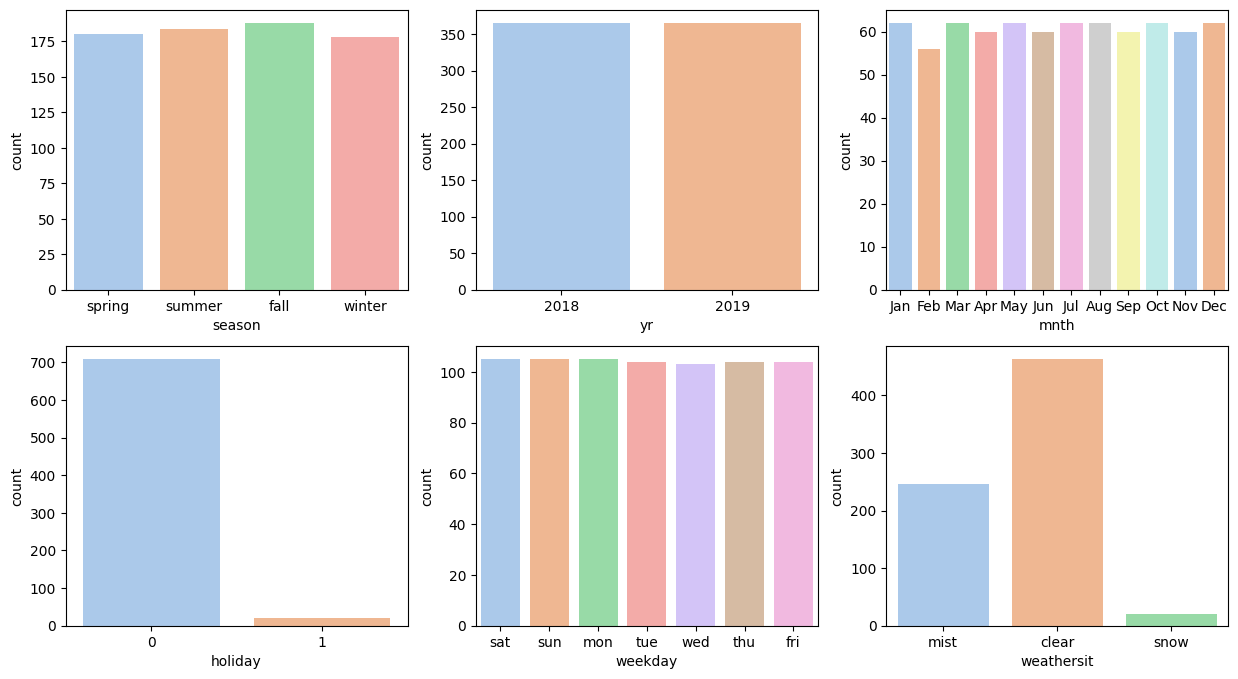

In [156]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data=bike_df, x='season', palette='pastel')
plt.subplot(2,3,2)
sns.countplot(data=bike_df, x='yr', palette='pastel')
plt.subplot(2,3,3)
sns.countplot(data=bike_df, x='mnth', palette='pastel')
plt.subplot(2,3,4)
sns.countplot(data=bike_df, x='holiday', palette='pastel')
plt.subplot(2,3,5)
sns.countplot(data=bike_df, x='weekday', palette='pastel')
plt.subplot(2,3,6)
sns.countplot(data=bike_df, x='weathersit', palette='pastel')
plt.show()

#### Bivariate Analysis

<Figure size 1500x800 with 0 Axes>

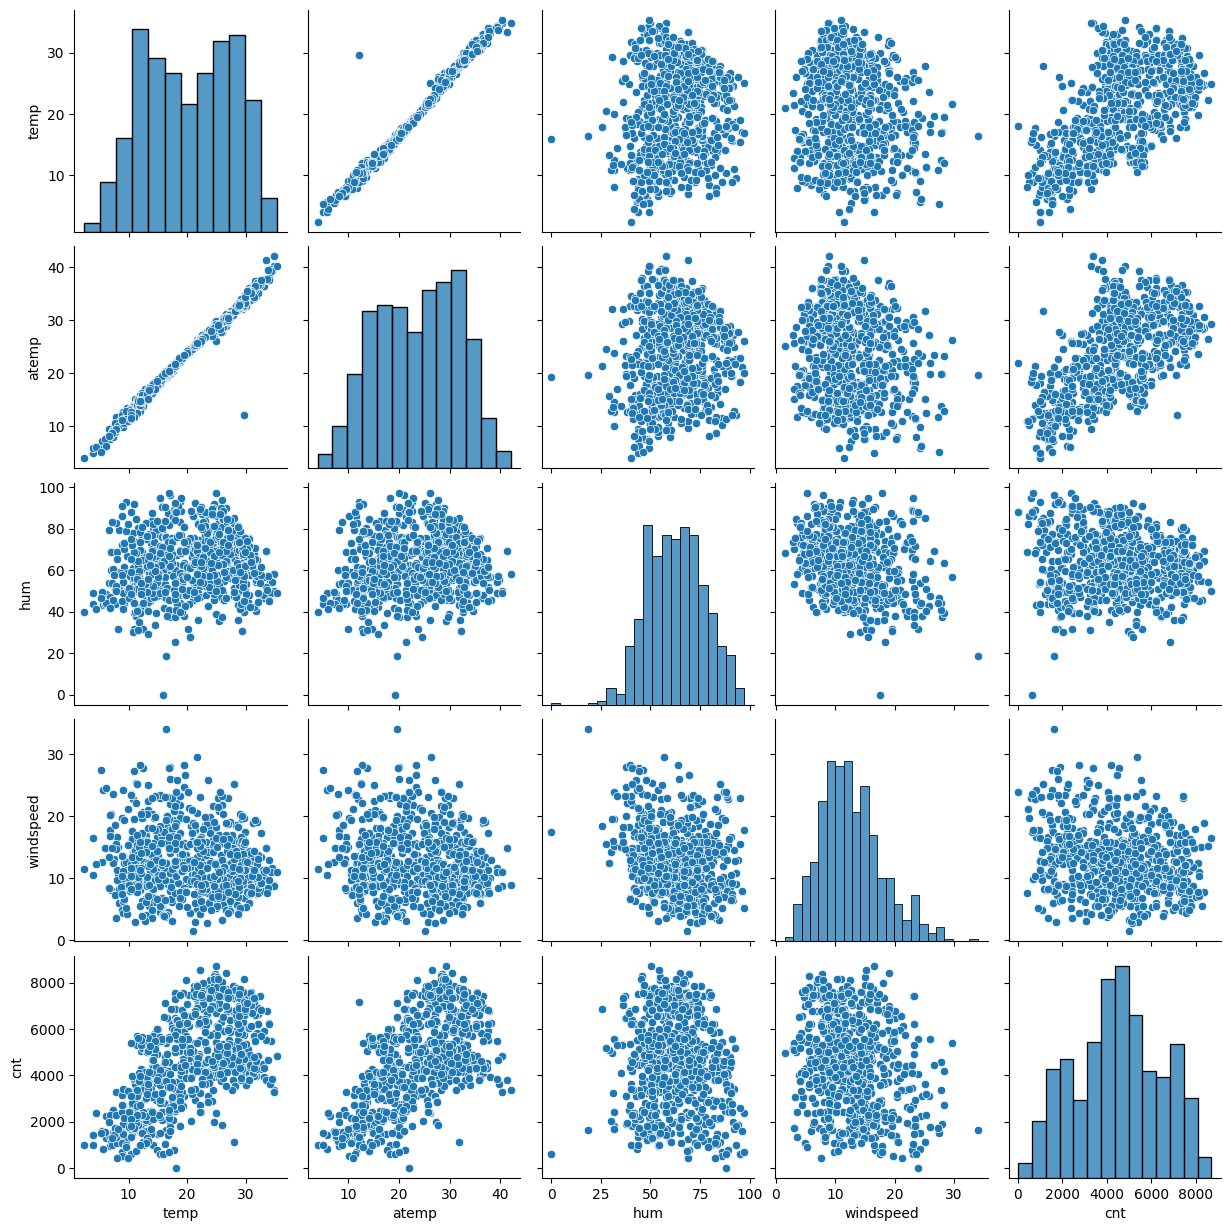

In [157]:
plt.figure(figsize=(15,8))
sns.pairplot(bike_df[num_cols])
plt.show()

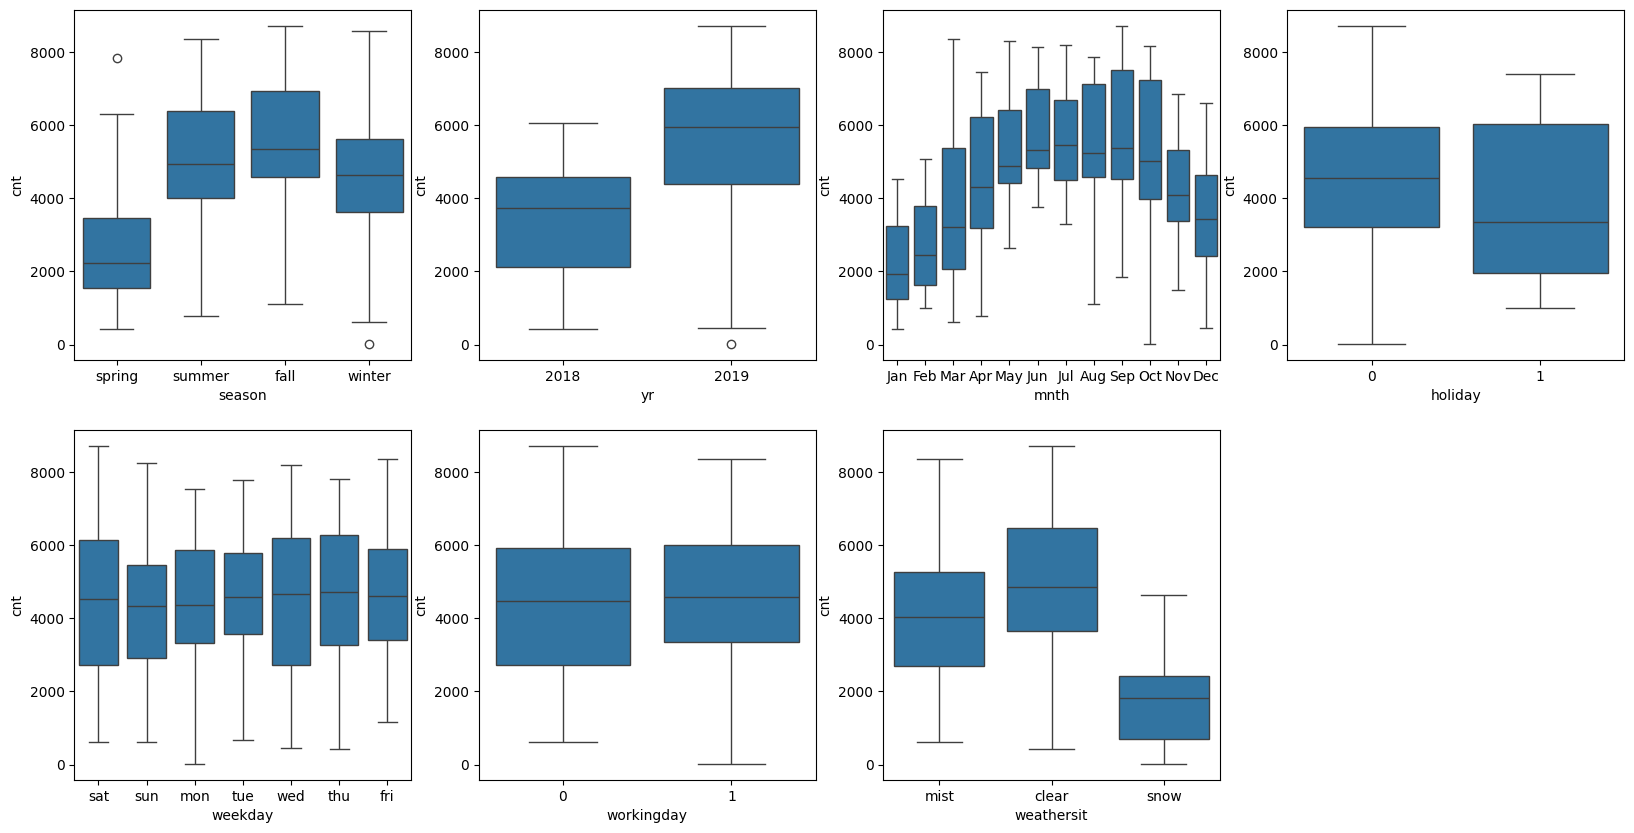

In [158]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=bike_df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike_df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.show()

#### Multivariate Analysis

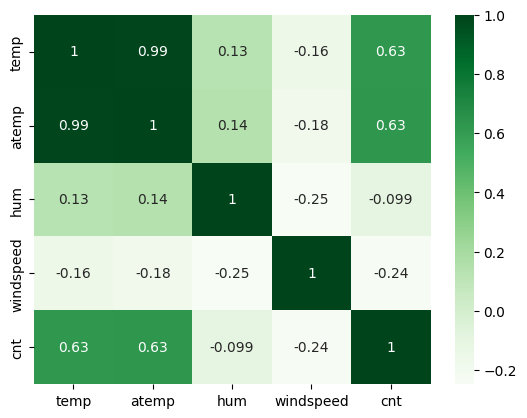

In [159]:
sns.heatmap(bike_df[num_cols].corr(), annot=True, cmap='Greens')
plt.show()

#### Analysis from EDA:
* The **'temp'** and **'atemp'** variables shows strong correlation.
* Both **'temp'** and **'atemp'** increase linearly with the **'cnt'** variable.
* The number of people using bikes is higher in 2019.
* There is a increase of bike usage in the months of May,June, July, August, Sep then there is a decrease of usage
* Bikes usage is higher during seasons like summer and fall.
* Bike usage is high when the weather is clear.

## Pre Processing Steps

#### Dummy Variables creation

In [160]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","yr","mnth","weekday","weathersit"],drop_first=True, dtype='int')

In [161]:
bike_df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [162]:
bike_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train-Test Split

In [163]:
df_train, df_test = train_test_split(bike_df, train_size=0.70, random_state=100)

In [164]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Data Scaling using MinMaxScaler

In [214]:
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols]) # As test data is unseen data we can't fit on it
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [215]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing training and testing set into X_train and y_train

In [216]:
X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

In [217]:
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

In [218]:
X_train.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


## Feature Selection using RFE (Recursive Feature Elimination)

#### Running RFE with the output number of variables are equal to 14

In [219]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=14)
rfe.fit(X_train, y_train)
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [220]:
selected_features=X_train.columns[rfe.support_]
print(selected_features)

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')


In [221]:
X_train = X_train[selected_features]
X_test = X_test[selected_features] # Adding the selected features to the test set as well

In [222]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.725633,0.264686,0,0,1,1,0,0,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,1,0,0,1,0,1,0
728,0,0,0.245101,0.498067,0.663106,1,0,1,0,0,0,1,0,0
482,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1,0


## Modelling

#### Model1

In [223]:
# Add constant to the variables
X_train_model1 = sm.add_constant(X_train)

In [224]:
X_train_model1.head(2)

,const,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
576,1.0,0,1,0.815169,0.725633,0.264686,0,0,1,1,0,0,0,0,0
426,1.0,0,0,0.442393,0.640189,0.255342,1,0,1,0,0,1,0,1,0


In [225]:
model1 = sm.OLS(y_train, X_train_model1)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          9.38e-190
Time:                        12:34:50   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2435      0.025      9.653      0.000       0.194       0.293
holiday            -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday          0.0948      0.009     10.227      0.000       0.077       0.113
temp                0.4776      0.031     15.613      0.000       0.418       0.538
hum                -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed          -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring      -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter       0.0558      0.012      4.528      0.000       0.032       0.080
yr_2019             0.2308      0.008     28.455      0.000       0.215       0.247
mnth_Jul           -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep            0.0591      0.015      3.829      0.000       0.029       0.089
weekday_sat         0.1046      0.011      9.177      0.000       0.082       0.127
weekday_sun         0.0521      0.012      4.349      0.000       0.029       0.076
weathersit_mist    -0.0578      0.011     -5.501      0.000      -0.078      -0.037
weathersit_snow    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     1.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* **holiday** is  insignificant in the presence of other variables hence dropping it.

In [226]:
 X_train_model1.drop('holiday', axis = 1, inplace=True)

#### Model2

In [227]:
X_train_model2 = sm.add_constant(X_train_model1)

In [228]:
model2 = sm.OLS(y_train, X_train_model2)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          9.38e-190
Time:                        12:35:09   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2355      0.040      5.915      0.000       0.157       0.314
workingday          0.1028      0.026      4.001      0.000       0.052       0.153
temp                0.4776      0.031     15.613      0.000       0.418       0.538
hum                -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed          -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring      -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter       0.0558      0.012      4.528      0.000       0.032       0.080
yr_2019             0.2308      0.008     28.455      0.000       0.215       0.247
mnth_Jul           -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep            0.0591      0.015      3.829      0.000       0.029       0.089
weekday_sat         0.1125      0.027      4.146      0.000       0.059       0.166
weekday_sun         0.0601      0.027      2.203      0.028       0.006       0.114
weathersit_mist    -0.0578      0.011     -5.501      0.000      -0.078      -0.037
weathersit_snow    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  All p-values looks good, so going for VIF

In [229]:
X_train_model2.drop('const', axis = 1, inplace=True)

In [230]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_model2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_model2.values,i) 
                 for i in range(len(X_train_model2.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
2,hum,29.194
1,temp,17.251
0,workingday,16.913
9,weekday_sat,4.565
3,windspeed,4.522
10,weekday_sun,4.450
4,season_spring,2.786
11,weathersit_mist,2.279
5,season_winter,2.145
6,yr_2019,2.079


* Dropping **'hum'** variable as it has high VIF value

In [231]:
X_train_model2.drop('hum', axis = 1, inplace=True)

#### Model3

In [232]:
X_train_model3 = sm.add_constant(X_train_model2)

In [233]:
model3 = sm.OLS(y_train, X_train_model3)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.26e-187
Time:                        12:35:33   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1553      0.035      4.475      0.000       0.087       0.224
workingday          0.1034      0.026      3.967      0.000       0.052       0.155
temp                0.4493      0.030     14.895      0.000       0.390       0.509
windspeed          -0.1404      0.025     -5.657      0.000      -0.189      -0.092
season_spring      -0.1118      0.015     -7.441      0.000      -0.141      -0.082
season_winter       0.0468      0.012      3.808      0.000       0.023       0.071
yr_2019             0.2344      0.008     28.661      0.000       0.218       0.250
mnth_Jul           -0.0711      0.017     -4.120      0.000      -0.105      -0.037
mnth_Sep            0.0559      0.016      3.573      0.000       0.025       0.087
weekday_sat         0.1148      0.028      4.171      0.000       0.061       0.169
weekday_sun         0.0578      0.028      2.089      0.037       0.003       0.112
weathersit_mist    -0.0816      0.009     -9.366      0.000      -0.099      -0.064
weathersit_snow    -0.2907      0.025    -11.824      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  All p-values looks good, so going for VIF

In [234]:
X_train_model3.drop('const', axis = 1, inplace=True)

In [235]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_model3.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_model3.values,i) 
                 for i in range(len(X_train_model3.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
0,workingday,13.117
1,temp,12.384
2,windspeed,4.478
8,weekday_sat,3.765
9,weekday_sun,3.536
3,season_spring,2.439
5,yr_2019,2.068
4,season_winter,1.775
10,weathersit_mist,1.580
6,mnth_Jul,1.370


* Dropping **'workingday'** as it has high VIF value

In [236]:
X_train_model3.drop('workingday', axis=1, inplace=True)

#### Model4

In [237]:
X_train_model4 = sm.add_constant(X_train_model3)

In [238]:
model4 = sm.OLS(y_train, X_train_model4)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.84e-185
Time:                        12:35:58   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2558      0.024     10.619      0.000       0.208       0.303
temp                0.4502      0.031     14.711      0.000       0.390       0.510
windspeed          -0.1425      0.025     -5.661      0.000      -0.192      -0.093
season_spring      -0.1148      0.015     -7.539      0.000      -0.145      -0.085
season_winter       0.0435      0.012      3.497      0.001       0.019       0.068
yr_2019             0.2349      0.008     28.308      0.000       0.219       0.251
mnth_Jul           -0.0704      0.017     -4.024      0.000      -0.105      -0.036
mnth_Sep            0.0521      0.016      3.289      0.001       0.021       0.083
weekday_sat         0.0154      0.012      1.332      0.184      -0.007       0.038
weekday_sun        -0.0415      0.012     -3.468      0.001      -0.065      -0.018
weathersit_mist    -0.0797      0.009     -9.026      0.000      -0.097      -0.062
weathersit_snow    -0.2860      0.025    -11.478      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       77.949   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.347
Skew:                          -0.755   Prob(JB):                     3.47e-46
Kurtosis:                       5.752   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Dropping **'weekday_sat'** as it has high p-value

In [239]:
X_train_model4.drop('weekday_sat', axis=1, inplace=True)

#### Model5

In [240]:
X_train_model5 = sm.add_constant(X_train_model4)

In [241]:
model5 = sm.OLS(y_train, X_train_model5)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.75e-186
Time:                        12:36:36   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2586      0.024     10.768      0.000       0.211       0.306
temp                0.4493      0.031     14.674      0.000       0.389       0.509
windspeed          -0.1410      0.025     -5.603      0.000      -0.191      -0.092
season_spring      -0.1147      0.015     -7.528      0.000      -0.145      -0.085
season_winter       0.0438      0.012      3.522      0.000       0.019       0.068
yr_2019             0.2346      0.008     28.259      0.000       0.218       0.251
mnth_Jul           -0.0698      0.018     -3.986      0.000      -0.104      -0.035
mnth_Sep            0.0522      0.016      3.291      0.001       0.021       0.083
weekday_sun        -0.0443      0.012     -3.760      0.000      -0.067      -0.021
weathersit_mist    -0.0797      0.009     -9.018      0.000      -0.097      -0.062
weathersit_snow    -0.2859      0.025    -11.462      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       73.106   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.558
Skew:                          -0.694   Prob(JB):                     2.31e-45
Kurtosis:                       5.784   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
X_train_model5.drop('const', axis = 1, inplace=True)

In [243]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_model5.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_model5.values,i) 
                 for i in range(len(X_train_model5.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
0,temp,4.670
1,windspeed,4.003
4,yr_2019,2.056
2,season_spring,1.644
8,weathersit_mist,1.517
3,season_winter,1.396
5,mnth_Jul,1.354
6,mnth_Sep,1.197
7,weekday_sun,1.170
9,weathersit_snow,1.082


In [245]:
X_train_model5 = sm.add_constant(X_train_model5)

In [260]:
print(round(res5.params, 4))

const              0.2586
temp               0.4493
windspeed         -0.1410
season_spring     -0.1147
season_winter      0.0438
yr_2019            0.2346
mnth_Jul          -0.0698
mnth_Sep           0.0522
weekday_sun       -0.0443
weathersit_mist   -0.0797
weathersit_snow   -0.2859
dtype: float64


In [272]:
# R2_score on final model 
r2_train = r2_score(y_train, y_train_pred)
print(round(r2_train,3))

0.832


## Final Model:

* cnt = 0.2586 + (0.4493\*temp) - (0.1410\*windspeed) - (0.1147\*season_spring) + (0.0438\*season_winter) + (0.2346\*yr_2019) - (0.0698\*mnth_Jul) + (0.0522\*mnth_Sep) - (0.0443\*weekday_sun) - (0.0797\*weathersit_mist) - (0.2859\*weathersit_snow)

## Residual Analysis

#### Checking whether the error terms are normally distributed or not

In [249]:
y_train_pred = res5.predict(X_train_model5)

In [250]:
res = (y_train)-(y_train_pred)
res

576    0.075335
426    0.003689
728   -0.146651
482   -0.081721
111   -0.089478
         ...   
578   -0.022139
53    -0.001215
350    0.039210
79    -0.075646
520    0.170451
Length: 510, dtype: float64

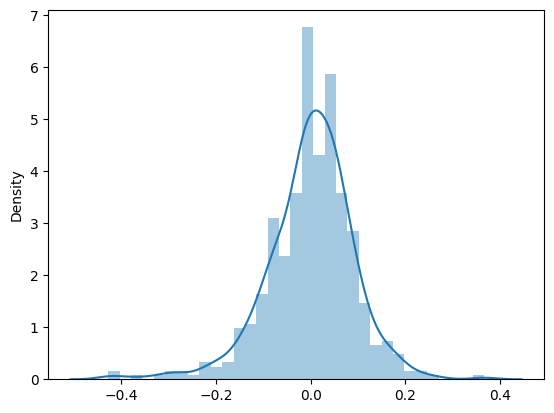

In [252]:
sns.distplot(res)
plt.show()

#### Looking for the patterns in the residuals. No pattern should be found.

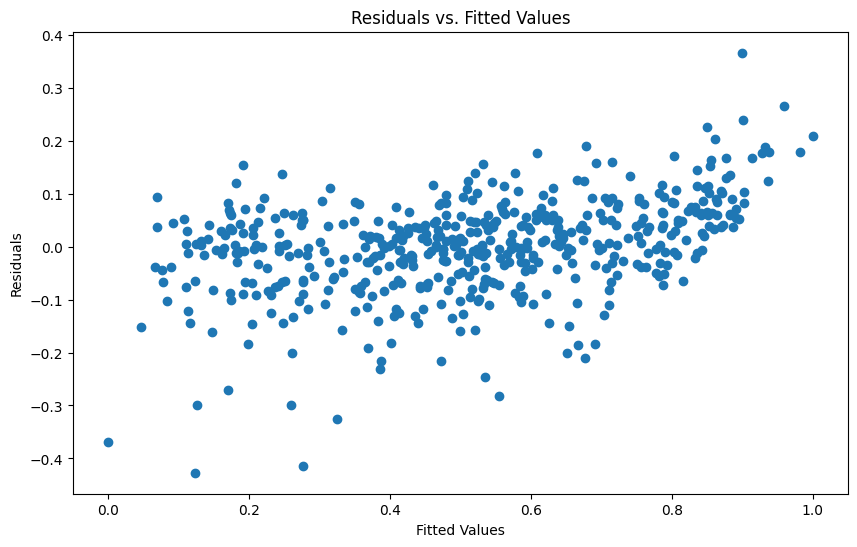

In [257]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, res)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## Making Predictions on test data

In [262]:
X_test.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
184,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,1,0
535,0,1,0.901354,0.610133,0.153728,0,0,1,0,0,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,1,0
221,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0,0,0,0,0,0,0,0,0


In [264]:
X_train_new = X_train_model5.drop('const', axis=1)
X_test_model = X_test[X_train_new.columns]

In [265]:
X_test_model.head(2)

,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sun,weathersit_mist,weathersit_snow
184,0.831783,0.084219,0,0,0,1,0,0,1,0
535,0.901354,0.153728,0,0,1,0,0,0,0,0


In [266]:
X_test_sm = sm.add_constant(X_test_model)

In [268]:
y_test_pred = res5.predict(X_test_sm)
y_test_pred

184    0.470999
535    0.876482
299    0.405652
221    0.606832
152    0.550000
         ...   
702    0.730327
127    0.467155
640    0.784990
72     0.264185
653    0.723675
Length: 220, dtype: float64

####  Plotting the graph between actual versus predicted values.

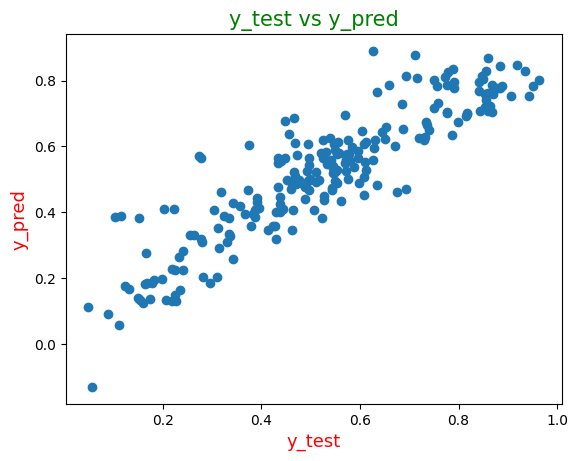

In [285]:
plt.scatter(y_test, y_test_pred)
plt.title("y_test vs y_pred", fontdict={'color':'Green', 'fontsize':15})
plt.xlabel("y_test", fontdict={'color':'Red', 'fontsize':13})
plt.ylabel("y_pred", fontdict={'color':'Red', 'fontsize':13})
plt.show()

#### Calculating R2_score on test set

In [274]:
r2_test = r2_score(y_test, y_test_pred)

print("R2_Train:",round(r2_train,3),"R2_Test:",round(r2_test,3))

R2_Train: 0.832 R2_Test: 0.809


In [276]:
# Calculating MSE 
print("MSE_Train:", round(mean_squared_error(y_train, y_train_pred),3),"MSE_Test:", round(mean_squared_error(y_test, y_test_pred),3))

MSE_Train: 0.008 MSE_Test: 0.009


In [287]:
res5.params

const              0.258592
temp               0.449323
windspeed         -0.141044
season_spring     -0.114692
season_winter      0.043831
yr_2019            0.234574
mnth_Jul          -0.069784
mnth_Sep           0.052198
weekday_sun       -0.044329
weathersit_mist   -0.079670
weathersit_snow   -0.285866
dtype: float64

Our final model has the following predictor variables that influence the bike booking:

+ temp
+ windspeed
+ season_spring
+ season_winter
+ yr_2019
+ mnth_Jul
+ mnth_Sep
+ weekday_sun
+ weathersit_mist
+ weathersit_snow